In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## loading the experiment datasets

dataset = [{"source_document":"i love programming computers for intelligence", 
            "compare_document":"boys playing in the ground and its 5 pm", 
            "required_similarity_score":1.0},
           {"source_document":"that person is amazing cook. he have a restaurent in london too", 
            "compare_document":"with all my friends i am wating a movie", 
            "required_similarity_score":0.8},]

dataset = pd.DataFrame(dataset)
dataset

,source_document,compare_document,required_similarity_score
0,i love programming computers for intelligence,boys playing in the ground and its 5 pm,1.0
1,that person is amazing cook. he have a restaur...,with all my friends i am wating a movie,0.8


In [3]:
## text preprocessing and tokenization

all_documents = pd.concat([dataset["source_document"], dataset["compare_document"]], axis=0).reset_index(drop=True)

vectorizer = TfidfVectorizer(ngram_range=(1,1), token_pattern=r'[a-zA-Z0-9]')
all_document_vector = vectorizer.fit_transform(all_documents)
all_document_vector = all_document_vector.toarray()

all_document_vector.shape

(4, 24)

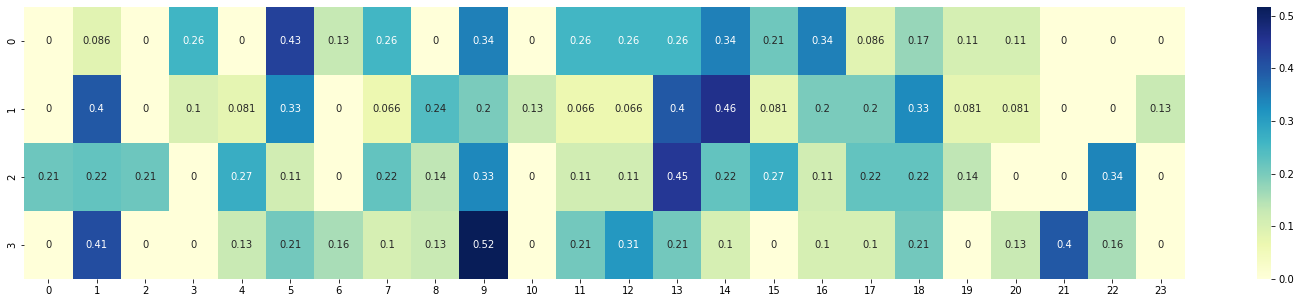

In [4]:
plt.figure(figsize=(26, 5))
sns.heatmap(all_document_vector, annot=True, cmap="YlGnBu")
plt.show()

In [5]:
## defining the cosine similarity

def cosine_similarity_required(a,b, required_similarity=1.0):
    """
    dot_product = np.dot(a,b.T)
    magnitude = np.linalg.norm(a) * np.linalg.norm(b)
    similarity = dot_product / magnitude
    """
    similarity = cosine_similarity(a,b)
    
    ## this is the difference required for the required_similarity
    # similarity_correction = np.round(required_similarity * (1 / similarity),5)
    similarity_correction = 1 - similarity
    
    
    return similarity, similarity_correction

In [8]:
source_documents_vector = all_document_vector[:2]
compare_documents_vector = all_document_vector[2:]
source_documents_vector.shape, compare_documents_vector.shape

((2, 24), (2, 24))

In [9]:
similarity, similarity_correction = cosine_similarity_required(a=source_documents_vector, 
                                                               b=compare_documents_vector, 
                                                               required_similarity=1.0)
similarity, similarity_correction

(array([[0.65622073, 0.66377056],
        [0.72750844, 0.66376494]]),
 array([[0.34377927, 0.33622944],
        [0.27249156, 0.33623506]]))

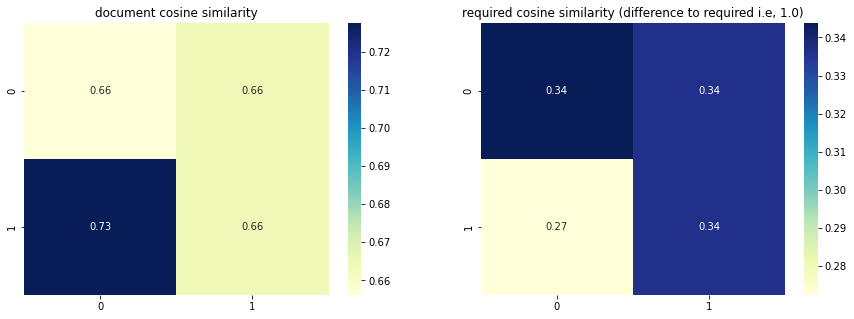

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
sns.heatmap(similarity,annot=True, cmap="YlGnBu", ax=axes[0])
axes[0].set_title("document cosine similarity")

sns.heatmap(similarity_correction,annot=True, cmap="YlGnBu", ax=axes[1])
axes[1].set_title("required cosine similarity (difference to required i.e, 1.0)")
plt.show()

In [11]:
for i in range(source_documents_vector.shape[0]):
    for j in range(compare_documents_vector.shape[0]):
        source_documents_vector[i] += similarity_correction[i][j]
        compare_documents_vector[i] += similarity_correction[i][i]

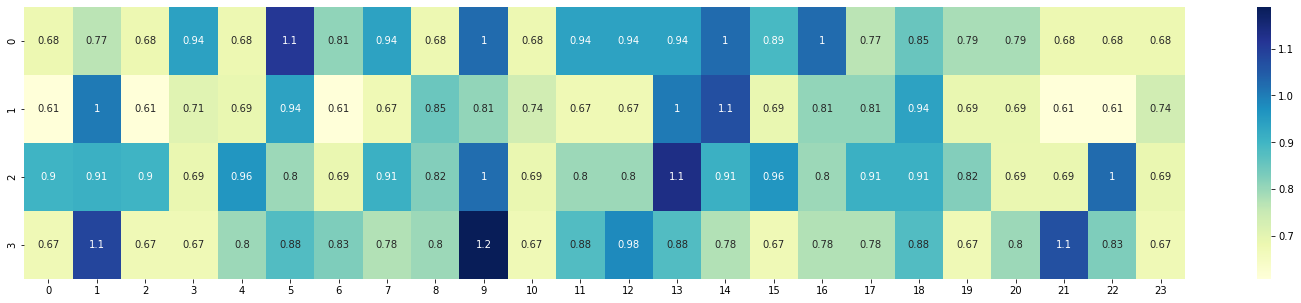

In [12]:
plt.figure(figsize=(26, 5))
sns.heatmap(all_document_vector, annot=True, cmap="YlGnBu")
plt.show()


In [13]:
similarity, similarity_correction = cosine_similarity_required(a=source_documents_vector, 
                                                               b=compare_documents_vector, required_similarity=1.0)
similarity, similarity_correction

(array([[0.98027169, 0.98004432],
        [0.9825237 , 0.97816438]]),
 array([[0.01972831, 0.01995568],
        [0.0174763 , 0.02183562]]))

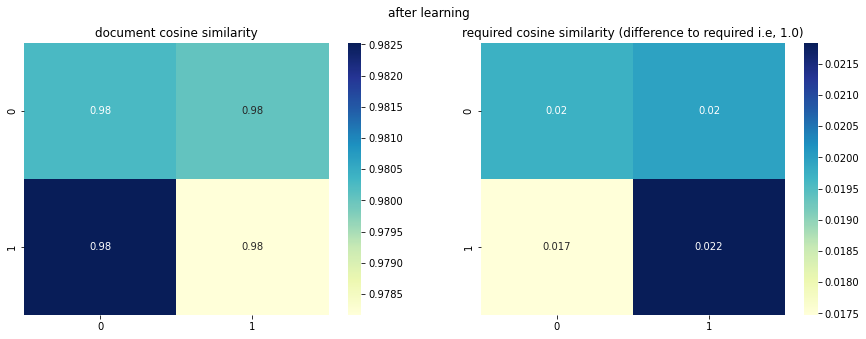

In [25]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
fig.suptitle("after learning")

sns.heatmap(similarity,annot=True, cmap="YlGnBu", ax=axes[0])
axes[0].set_title("document cosine similarity")

sns.heatmap(similarity_correction,annot=True, cmap="YlGnBu", ax=axes[1])
axes[1].set_title("required cosine similarity (difference to required i.e, 1.0)")
plt.show()

array([0.71560775, 0.9416014 , 0.71560775, 0.75201411, 0.78212379,
       0.931545  , 0.73366299, 0.82470073, 0.78834776, 1.0103089 ,
       0.6937749 , 0.82264663, 0.8484676 , 0.98868081, 0.94507708,
       0.80310099, 0.85127484, 0.8146931 , 0.89496326, 0.74272579,
       0.74021333, 0.76115199, 0.78543075, 0.6937749 ])

## adjusting the learnt token weights by reverse engineering mean token weights

In [20]:
## correcting the weights of the tokens
#adjusting_token_weights = all_document_vector.mean(axis=0)
adjusting_token_weights = (source_documents_vector.mean(axis=0) + compare_documents_vector.mean(axis=0))/2
adjusting_token_weights

array([0.71560775, 0.9416014 , 0.71560775, 0.75201411, 0.78212379,
       0.931545  , 0.73366299, 0.82470073, 0.78834776, 1.0103089 ,
       0.6937749 , 0.82264663, 0.8484676 , 0.98868081, 0.94507708,
       0.80310099, 0.85127484, 0.8146931 , 0.89496326, 0.74272579,
       0.74021333, 0.76115199, 0.78543075, 0.6937749 ])

In [21]:
new_all_document_vector = vectorizer.transform(all_documents)
new_adj_all_document_vector = new_all_document_vector.toarray() + adjusting_token_weights

In [22]:
cosine_similarity(new_all_document_vector[:2],new_all_document_vector[2:])

array([[0.65622073, 0.66377056],
       [0.72750844, 0.66376494]])

In [23]:
cosine_similarity(new_adj_all_document_vector[:2], new_adj_all_document_vector[2:])

array([[0.98553551, 0.98567909],
       [0.98854083, 0.98567913]])